PERCENTAGE OF EACH SECTIONS

Percentage of each number:
 0     40.451349
 4     19.664746
 11     9.270427
 1      6.919447
 12     6.638046
 3      3.226621
 14     2.863447
 10     2.860922
 2      2.818325
 8      1.421828
 9      1.356181
 13     0.803642
 5      0.760719
 7      0.690837
-1      0.150108
 6      0.103357
Name: count, dtype: float64


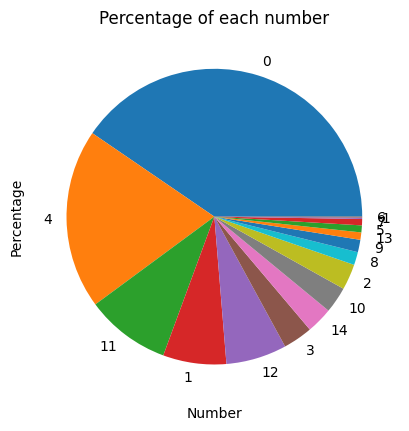

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

color_mapping = {
    -1: "unknown", #unclassified color
    0: "bg",  # White
    1: "mother",  # Yellow (mother)
    2: "daughter",  # Light Blue (daughter)
    3: "son",  # Pink (son)
    4: "cupboard", # Brown (cupboard)
    5: "cookieJar", # Purple (Cookie Jar)
    6: "cookie", # Tan (Cookie) 
    7: "stool", # Maroon (Stool)
    8: "dishAndRag", # Green (Dish and rag)
    9: "sink", # Red (Sink)
    10: "water", # Blue (Water)
    11: "curtain", # Orange (Curtain)
    12: "outdoors", # Light Red (Outdoors)
    13: "dishes", # Salmon (dishes)
    14: "countertops" # Grey (countertops)
}

def calculate_percentages(data):
    total_count = data.size
    counts = data.value_counts()
    percentages = counts / total_count * 100
    return percentages

def main(file_path):
    data = pd.read_csv(file_path, header=None)
    percentages = calculate_percentages(data.stack())
    print("Percentage of each number:")
    print(percentages)
    
    # Plotting
    percentages.plot(kind='pie')
    plt.title('Percentage of each number')
    plt.xlabel('Number')
    plt.ylabel('Percentage')
    plt.show()

if __name__ == "__main__":
    file_path = 'output_array_but_better.csv'  
    main(file_path)


In [5]:
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.5 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.8 MB/s eta 0:00:00


SHIFT TRANSCRIPT FILE BY A CONSTANT TIME

In [2]:
import os
import yaml
import sys

input_path = "./realigned/PC0004_transcript_aligned_eyegaze.yaml"
output_path = input_path

offset = 0

if not os.path.exists(input_path):
    print(f"File '{input_path}' doesn't exist")
    sys.exit()
with open(input_path, "r") as file:
    data = yaml.safe_load(file)
for entry in data:
    if not 'result' in entry:
        continue
    print(entry)
    for word_data in entry['result']:
        word_data['start'] += offset
        word_data['end'] += offset
with open(output_path, "w") as file:
    yaml.safe_dump(data, file)